In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os 
import seaborn as sns 
import sklearn as skl
from imblearn.over_sampling import SMOTE
from scipy.stats import norm 
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.linear_model import LogisticRegression  
from sklearn.metrics import confusion_matrix, classification_report
import warnings  
warnings.filterwarnings('ignore') 
%matplotlib inline 

In [2]:
data = pd.read_csv('created_data/feature_engineered_data.csv')
data.head()

,Income,Monthly Premium Auto,Total Claim Amount,Coverage_1,Coverage_2,Education_1,Education_2,Education_3,Education_4,EmploymentStatus_1,...,Renew Offer Type_2,Renew Offer Type_3,Vehicle Class_1,Vehicle Class_2,Vehicle Class_3,Vehicle Class_4,Vehicle Class_5,Vehicle Size_1,Vehicle Size_2,Response
0,0.612827,-0.703925,-0.169640,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
1,-1.239617,0.022691,2.400737,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0.365710,0.429596,0.455734,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
3,-1.239617,0.371467,0.329769,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0.203390,-0.587666,-1.018843,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [3]:
X = data.drop(['Response'],axis= 1)
y = data['Response']

In [4]:
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 
  
# describes info about train and test set 
print("Shape of X_train dataset: ", X_train.shape) 
print("Shape of y_train dataset: ", y_train.shape) 
print("Shape of X_test dataset: ", X_test.shape) 
print("Shape of y_test dataset: ", y_test.shape) 

Shape of X_train dataset:  (6393, 35)
Shape of y_train dataset:  (6393,)
Shape of X_test dataset:  (2741, 35)
Shape of y_test dataset:  (2741,)


In [10]:
# logistic regression object 
lr = LogisticRegression() 
  
# train the model on train set 
lr.fit(X_train, y_train.ravel()) 
  
predictions = lr.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.99      0.92      2323
           1       0.75      0.15      0.25       418

    accuracy                           0.86      2741
   macro avg       0.81      0.57      0.59      2741
weighted avg       0.85      0.86      0.82      2741



In [5]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))



Before OverSampling, counts of label '1': 890
Before OverSampling, counts of label '0': 5503 



In [6]:
%%markdown

### Since there is a significant difference in the number of people who responded vs those who did not, it is necessary for us to over sample the number of people who responded. 

### This is important to avoid the generalization of the overasampled class(0) by ML models. Since the oversampled class makes up for the majority of the data, ML models will tend to be biased towards that class during prediction. 


### Since there is a significant difference in the number of people who responded vs those who did not, it is necessary for us to over sample the number of people who responded. 

### This is important to avoid the generalization of the overasampled class(0) by ML models. Since the oversampled class makes up for the majority of the data, ML models will tend to be biased towards that class during prediction. 


In [7]:
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel()) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (11006, 35)
After OverSampling, the shape of train_y: (11006,) 

After OverSampling, counts of label '1': 5503
After OverSampling, counts of label '0': 5503


In [9]:
lr1 = LogisticRegression() 
lr1.fit(X_train_res, y_train_res.ravel()) 
predictions = lr1.predict(X_test) 
  
# print classification report 
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      2323
           1       0.35      0.46      0.40       418

    accuracy                           0.79      2741
   macro avg       0.62      0.65      0.64      2741
weighted avg       0.81      0.79      0.80      2741



In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_res, y_train_res)
svc_pred = svc.predict(X_test)

print(confusion_matrix(svc_pred,y_test))
print('accuracy_score:',accuracy_score(svc_pred, y_test))
print(classification_report(svc_pred, y_test))

cross_val_score_svc = cross_validate(svc, X_train_res, y_train_res,cv = 5)
print('Cross validation test_score',cross_val_score_svc['test_score'].mean())

[[2015  155]
 [ 308  263]]
accuracy_score: 0.8310835461510397
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      2170
           1       0.63      0.46      0.53       571

    accuracy                           0.83      2741
   macro avg       0.75      0.69      0.71      2741
weighted avg       0.82      0.83      0.82      2741

Cross validation test_score 0.8800739157042397


In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train_res, y_train_res)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(rfc_pred,y_test))
print('Accuracy score:',accuracy_score(rfc_pred, y_test))
print(classification_report(rfc_pred, y_test))

cross_val_score_rfc = cross_validate(rfc, X_train_res, y_train_res,cv = 5)

print('Cross validation test_score',cross_val_score_rfc['test_score'].mean())

[[2245   96]
 [  78  322]]
Accuracy score: 0.9365195184239329
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2341
           1       0.77      0.81      0.79       400

    accuracy                           0.94      2741
   macro avg       0.87      0.88      0.87      2741
weighted avg       0.94      0.94      0.94      2741

Cross validation test_score 0.9574819223860345


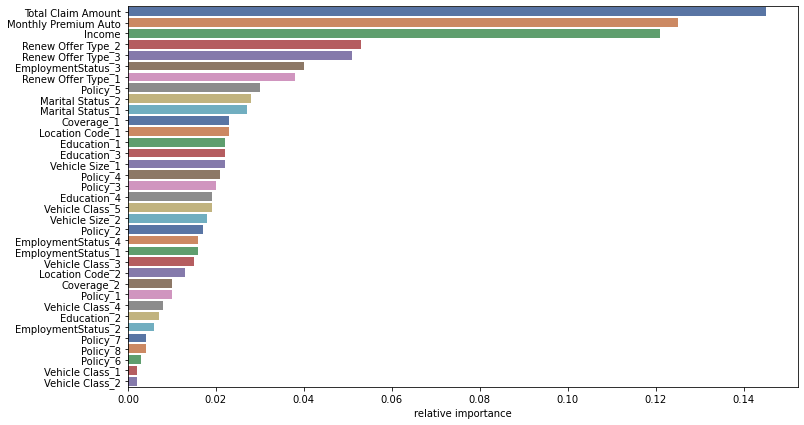

In [19]:
feature_imp = rfc.feature_importances_.round(3)
ser_rank = pd.Series(feature_imp, index=X.columns).sort_values(ascending = False)

plt.figure(figsize=(12,7))
sns.barplot(x= ser_rank.values, y = ser_rank.index, palette='deep')
plt.xlabel('relative importance')
plt.show()

In [22]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

xgbc = XGBClassifier()
xgbc.fit(X_train_res, y_train_res)
xgbc_pred = xgbc.predict(X_test)

print(confusion_matrix(xgbc_pred,y_test))
print('Accuracy score:',accuracy_score(xgbc_pred, y_test))
print(classification_report(xgbc_pred, y_test))

cross_val_score_rfc = cross_validate(xgbc, X_train_res, y_train_res,cv = 5)

print('Cross validation test_score',cross_val_score_rfc['test_score'].mean())

[[2216   36]
 [ 107  382]]
Accuracy score: 0.9478292593943816
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2252
           1       0.91      0.78      0.84       489

    accuracy                           0.95      2741
   macro avg       0.93      0.88      0.91      2741
weighted avg       0.95      0.95      0.95      2741

Cross validation test_score 0.9556625858694401


In [23]:
xgbc.predict_proba(X_test)

array([[9.9626267e-01, 3.7373174e-03],
       [9.9523115e-01, 4.7688587e-03],
       [9.2373437e-01, 7.6265633e-02],
       ...,
       [9.9513847e-01, 4.8615611e-03],
       [9.9984449e-01, 1.5553636e-04],
       [3.1467849e-01, 6.8532151e-01]], dtype=float32)

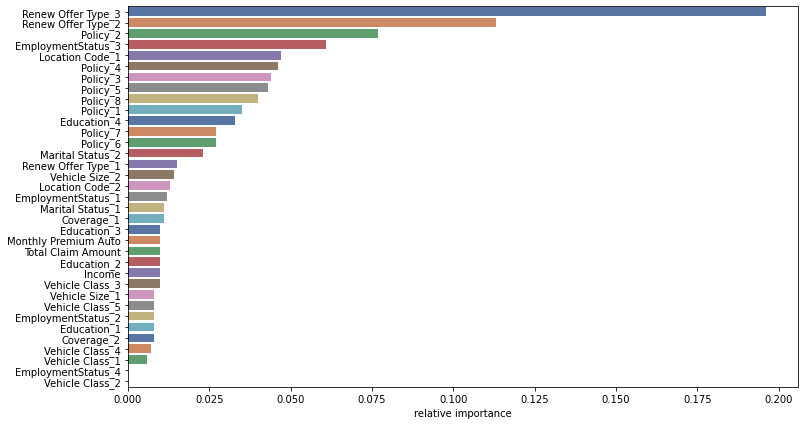

In [21]:
feature_imp = xgbc.feature_importances_.round(3)
ser_rank = pd.Series(feature_imp, index=X.columns).sort_values(ascending = False)

plt.figure(figsize=(12,7))
sns.barplot(x= ser_rank.values, y = ser_rank.index, palette='deep')
plt.xlabel('relative importance')
plt.show()